## Filtrado de Datos
Haga la lectura del archivo "titanic3.csv" y responda las siguientes preguntas:

In [1]:
# importamos las librerias
import pandas as pd
import numpy as np

In [2]:
# lectura de los datos:
titanic = pd.read_csv('titanic3.csv')
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


 i) ¿Cuántos cuerpos fueron encontrados?

 Notemos que la categoria de 'body' esta enumerado, es decir que en teoria todos son registros únicos, el valor más alto correspode al numero de cuerpos de cuerpos encontrados:

In [3]:
max(titanic['body'].dropna())

328.0

Es decir que en total se ecnontraron **328** cuerpos; investigando un poco más a fondo descubrimos que este dato es real; tan solo consiguieron recuperar a lo largo de tres meses 328 cuerpos. De ellos, 119 fueron arrojados de nuevo al mar. De los 209 restantes, 150 no fueron reclamados por sus familiares y se les dio sepultura en varios cementerios de Halifax, en Nueva Escocia. Por lo tanto, tan solo 59 fueron recuperados, identificados y enterrados de la manera tradicional.

Auqnue en realidad en esta base de datos olo estan registrados **121** cuerpos.

In [4]:
cuerpos = titanic[titanic['body'].notnull()]
len(cuerpos)

121

ii) ¿Cuántos de ellos fueron hombres mayores a cuarenta años?

Tomamos el subdataframe de los cuerpos, y vamos a filtrar de forma que `sex = male` y `age > 40`

In [5]:
len(cuerpos[(cuerpos['sex'] == 'male') & (cuerpos['age'] > 40)])

39

Solo 39 de los cuerpos registrados en esta base de datos fueron hombre mayores de 40

iii) ¿Cuantas mujeres desaparecieron entre las edades de 15 a 35 años?

In [6]:
 # Base de datos de muejres entre 15 y 35
mujeres = titanic[(titanic['sex'] == 'female') & (titanic['age'] >= 15) & (titanic['age'] <= 35)]

# Vamos a considerar como desaparecidas aquellas que no sobrevivieron, y que ademas
# no hay registro de un cuerpo encotrado 
len(mujeres[(mujeres.survived == 0) & (mujeres.body.isnull())])

51

**51** Mujeres entre 15 y 35 años se pueden cosniderar con el estatus de desaparecidas.

iv) ¿Cuantos hombres mayores a 20 años sobrevivieron?

In [7]:
len(titanic[(titanic['sex'] == 'male') & (titanic['age'] > 20) & (titanic.survived == 1)])

96

**96** Hombres mayores de 20 sobrevivieron.

 v) ¿Cuantas mujeres menores a 25 años sobrevivieron?.

In [8]:
len(titanic[(titanic['sex'] == 'female') & (titanic['age'] < 25) & (titanic.survived == 1)])

124

**124** Mujeres menores de 25 sobrevivieron.


Además, Genere una copia del conjunto de datos y rellene los datos faltantes (NA's) con un valor de 0 en el caso de datos numéricos usados como identificador la palabra "desconocido" en el caso de datos tipo cadena de caracteres y en el caso de variables numéricas use el promedio de los valores de esa columna (p.ej., la edad y la tarifa).

In [9]:
# Primero veamos el tipo de cada variable:
titanic.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [10]:
for x in list(titanic.columns):
    y =  titanic[x].isna().sum()
    print('El número de datos faltantes en la columan {} es {}'.format(x,y))

El número de datos faltantes en la columan pclass es 0
El número de datos faltantes en la columan survived es 0
El número de datos faltantes en la columan name es 0
El número de datos faltantes en la columan sex es 0
El número de datos faltantes en la columan age es 263
El número de datos faltantes en la columan sibsp es 0
El número de datos faltantes en la columan parch es 0
El número de datos faltantes en la columan ticket es 0
El número de datos faltantes en la columan fare es 1
El número de datos faltantes en la columan cabin es 1014
El número de datos faltantes en la columan embarked es 2
El número de datos faltantes en la columan boat es 823
El número de datos faltantes en la columan body es 1188
El número de datos faltantes en la columan home.dest es 564


In [20]:
titanic_2 = titanic.copy()
# Media para la edad
titanic_2.age = titanic_2.age.fillna(np.mean(titanic_2.age))
# Media para fare
titanic_2.fare = titanic_2.fare.fillna(np.mean(titanic_2.fare))
# Desconocido para cabina 
titanic_2.cabin = titanic_2.cabin.fillna('desconocido')
# desconocido para embarked
titanic_2.embarked = titanic_2.embarked.fillna('desconocido')
# 0 para boat 
titanic_2.boat = titanic_2.boat.fillna(0)
# 0 para cuerpo
titanic_2.body = titanic_2.body.fillna(0)
# desconocido para home.dest
titanic_2['home.dest'] = titanic_2['home.dest'].fillna('desconocido')


In [12]:
for x in list(titanic_2.columns):
    y =  titanic[x].isna().sum()
    print('El número de datos faltantes en la columan {} es {}'.format(x,y))

El número de datos faltantes en la columan pclass es 0
El número de datos faltantes en la columan survived es 0
El número de datos faltantes en la columan name es 0
El número de datos faltantes en la columan sex es 0
El número de datos faltantes en la columan age es 263
El número de datos faltantes en la columan sibsp es 0
El número de datos faltantes en la columan parch es 0
El número de datos faltantes en la columan ticket es 0
El número de datos faltantes en la columan fare es 1
El número de datos faltantes en la columan cabin es 1014
El número de datos faltantes en la columan embarked es 2
El número de datos faltantes en la columan boat es 823
El número de datos faltantes en la columan body es 1188
El número de datos faltantes en la columan home.dest es 564


Finalmente, de los campos "age" y "fare" agregue columnas al conjunto de datos qué contengan los valores normalizados. Elija la normalización tipo $\frac{x_{i}-\bar{x}}{\sigma}$ para el caso de que la variable tenga una distribución normal y utilice la normalización tipo $\frac{x_{i}-x_{\min }}{x_{\max }-x_{\min }}$ en cualquier otro caso.

,sumsquare_error,aic,bic,kl_div
norm,0.076207,1081.859612,-12750.116452,inf


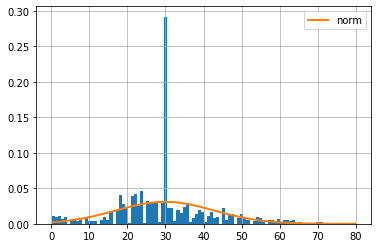

In [80]:
import matplotlib as plt

age = titanic_2["age"].values

# Distribuciones

from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(age,
           distributions=["norm"])
f.fit()
f.summary()



,sumsquare_error,aic,bic,kl_div
norm,0.004974,3651.549809,-16322.699915,inf


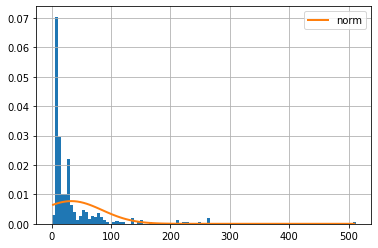

In [79]:
fare = titanic_2["fare"].values

# Distribuciones

from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(fare,
           distributions=["norm"])
f.fit()
f.summary()


Como era de esperarse, la variable de edad es la que mayor similitud a una distribución normal, sin embargo, hay un sobre ajuste al rededor de la media debido a la sustituciones de los valores faltantes que hicimos.

In [21]:
titanic_2['age_2'] = (titanic_2['age'] - np.mean(titanic_2['age']))/(np.std(titanic_2['age']))
titanic_2['fare_2'] = (titanic_2['fare'] - np.min(titanic_2['fare']))/(np.max(titanic_2['fare'])-np.min(titanic_2['fare']))

## Distancias:
Utilizando el archivo “movies.csv” construya una o varias funciones qué
permitan calcular una matriz de distancias para los datos numéricos en el dataFrame. La
función debe permitir construir la matriz de distancia usando las distancias de Manhattan,
Euclideana y de Minkowski (para p igual a 3).

In [26]:
# Lectura de datos
movies = pd.read_csv('movies.csv', sep = ';')

In [28]:
movies = movies.set_index('user_id')

In [29]:
movies

,star_wars,lord_of_the_rings,harry_potter
user_id,,,
1,1.2,4.9,2.1
2,2.1,8.1,7.9
3,7.4,3.0,9.9
4,5.6,0.5,1.8
5,1.5,8.3,2.6
6,2.5,3.7,6.5
7,2.0,8.2,8.5
8,1.8,9.3,4.5
9,2.6,1.7,3.1


In [30]:
# Definamos las distancias

def distancia_euclideana(x,y):
  n = len(x)
  suma = 0
  for i in range(n):
    suma += (y[i]-x[i])**2
  return np.sqrt(suma)

def distancia_manhattan(x,y):
  n = len(x)
  suma = 0
  for i in range(n):
    suma += abs(y[i]-x[i])
  return suma

def distancia_minkowski(x, y):
  n = len(x)
  suma = 0
  for i in range(n):
    suma += abs(y[i]-x[i])**3
  return suma**(1/3)

In [93]:
def matriz_distancias(df, distancia):
    dis = {'euclideana': distancia_euclideana, 'manhattan': distancia_manhattan,
            'minkoski': distancia_minkowski}
    
    df = np.array(df)
    matrix = pd.DataFrame()
    l = 0
    for x in df:
        rcol = []
        for y in df:
            rcol.append(dis[distancia](x, y))
        matrix[l] = rcol
        l += 1
    return matrix

In [94]:
matriz_distancias(movies, 'euclideana')

,0,1,2,3,4,5,6,7,8,9
0,0.000000,6.685058,10.143471,6.229767,3.449638,4.742362,7.244998,5.047772,3.633180,0.412311
1,6.685058,0.000000,7.622336,10.354709,5.337602,4.634652,0.616441,3.618011,8.015610,6.578754
2,10.143471,7.622336,0.000000,8.666026,10.779147,6.004998,7.626270,10.010494,8.424369,9.770363
3,6.229767,10.354709,8.666026,0.000000,8.848164,6.476110,10.823123,9.958414,3.482815,5.890671
4,3.449638,5.337602,10.779147,8.848164,0.000000,6.113101,5.921993,2.167948,6.709694,3.612478
5,4.742362,4.634652,6.004998,6.476110,6.113101,0.000000,4.949747,5.987487,3.945884,4.431704
6,7.244998,0.616441,7.626270,10.823123,5.921993,4.949747,0.000000,4.153312,8.471718,7.137226
7,5.047772,3.618011,10.010494,9.958414,2.167948,5.987487,4.153312,0.000000,7.769170,5.107837
8,3.633180,8.015610,8.424369,3.482815,6.709694,3.945884,8.471718,7.769170,0.000000,3.293934
9,0.412311,6.578754,9.770363,5.890671,3.612478,4.431704,7.137226,5.107837,3.293934,0.000000


In [95]:
matriz_distancias(movies, 'manhattan')

,0,1,2,3,4,5,6,7,8,9
0,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
1,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
2,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
3,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
4,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
5,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
6,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
7,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
8,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9
9,0.7,9.6,15.2,8.8,3.9,6.2,10.2,7.1,4.9,0.0


In [96]:
matriz_distancias(movies, 'minkoski')

,0,1,2,3,4,5,6,7,8,9
0,0.000000,6.114549,8.961726,5.543945,3.404377,4.466567,6.683848,4.629551,3.317507,0.350340
1,6.114549,0.000000,6.615513,8.916227,5.302657,4.447825,0.601846,3.449870,7.197511,5.991989
2,8.961726,6.615513,0.000000,8.207578,9.058357,5.398079,6.700394,8.354511,7.531547,8.659138
3,5.543945,8.916227,8.207578,0.000000,8.163235,5.500077,9.298439,9.109875,3.138845,5.230954
4,3.404377,5.302657,9.058357,8.163235,0.000000,5.402182,5.901206,1.990455,6.611123,3.600694
5,4.466567,4.447825,5.398079,5.500077,5.402182,0.000000,4.629956,5.687311,3.616616,4.237458
6,6.683848,0.601846,6.700394,9.298439,5.901206,4.629956,0.000000,4.027704,7.561305,6.552459
7,4.629551,3.449870,8.354511,9.109875,1.990455,5.687311,4.027704,0.000000,7.618744,4.762365
8,3.317507,7.197511,7.531547,3.138845,6.611123,3.616616,7.561305,7.618744,0.000000,3.066762
9,0.350340,5.991989,8.659138,5.230954,3.600694,4.237458,6.552459,4.762365,3.066762,0.000000


<AxesSubplot:>

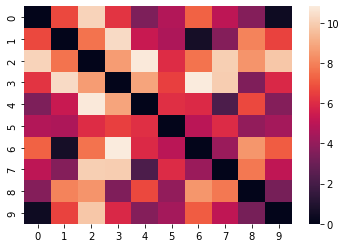

In [54]:
import seaborn as sns

sns.heatmap(matriz_distancias(movies, 'euclideana'))

<AxesSubplot:>

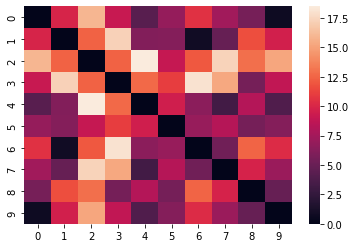

In [55]:
sns.heatmap(matriz_distancias(movies, 'manhattan'))

<AxesSubplot:>

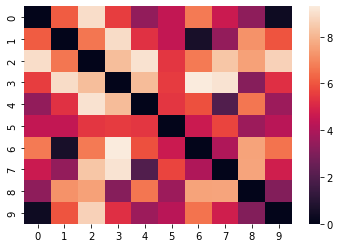

In [56]:
sns.heatmap(matriz_distancias(movies, 'minkoski'))

Compare sus resultados con los que se obtienen por medio del método distance_matrix
de scipy.spatial.

In [58]:
# Euclidea
from scipy.spatial import distance_matrix
distance_matrix(np.array(movies), np.array(movies))

array([[ 0.        ,  6.68505797, 10.14347081,  6.22976725,  3.44963766,
         4.74236228,  7.24499827,  5.04777179,  3.63318042,  0.41231056],
       [ 6.68505797,  0.        ,  7.6223356 , 10.35470907,  5.33760246,
         4.63465209,  0.6164414 ,  3.6180105 ,  8.01560977,  6.57875368],
       [10.14347081,  7.6223356 ,  0.        ,  8.66602562, 10.77914653,
         6.00499792,  7.62627039, 10.01049449,  8.42436941,  9.77036335],
       [ 6.22976725, 10.35470907,  8.66602562,  0.        ,  8.84816365,
         6.47610994, 10.82312339,  9.95841353,  3.48281495,  5.89067059],
       [ 3.44963766,  5.33760246, 10.77914653,  8.84816365,  0.        ,
         6.11310069,  5.92199291,  2.16794834,  6.70969448,  3.61247837],
       [ 4.74236228,  4.63465209,  6.00499792,  6.47610994,  6.11310069,
         0.        ,  4.94974747,  5.98748695,  3.94588393,  4.43170396],
       [ 7.24499827,  0.6164414 ,  7.62627039, 10.82312339,  5.92199291,
         4.94974747,  0.        ,  4.15331193

In [98]:
# Manhattan
distance_matrix(np.array(movies), np.array(movies), p = 1)

array([[ 0. ,  9.9, 15.9,  9.1,  4.2,  6.9, 10.5,  7.4,  5.6,  0.7],
       [ 9.9,  0. , 12.4, 17.2,  6.1,  6.2,  0.8,  4.9, 11.7,  9.6],
       [15.9, 12.4,  0. , 12.4, 18.5,  9. , 12. , 17.3, 12.9, 15.2],
       [ 9.1, 17.2, 12.4,  0. , 12.7, 11. , 18. , 15.3,  5.5,  8.8],
       [ 4.2,  6.1, 18.5, 12.7,  0. ,  9.5,  6.5,  3.2,  8.2,  3.9],
       [ 6.9,  6.2,  9. , 11. ,  9.5,  0. ,  7. ,  8.3,  5.5,  6.2],
       [10.5,  0.8, 12. , 18. ,  6.5,  7. ,  0. ,  5.3, 12.5, 10.2],
       [ 7.4,  4.9, 17.3, 15.3,  3.2,  8.3,  5.3,  0. ,  9.8,  7.1],
       [ 5.6, 11.7, 12.9,  5.5,  8.2,  5.5, 12.5,  9.8,  0. ,  4.9],
       [ 0.7,  9.6, 15.2,  8.8,  3.9,  6.2, 10.2,  7.1,  4.9,  0. ]])

In [97]:
# Minkoswki
distance_matrix(np.array(movies), np.array(movies), p = 3)

array([[0.        , 6.11454916, 8.96172636, 5.54394546, 3.40437729,
        4.46656704, 6.68384763, 4.6295514 , 3.3175072 , 0.35033981],
       [6.11454916, 0.        , 6.61551294, 8.91622676, 5.30265679,
        4.44782539, 0.60184617, 3.44987047, 7.19751071, 5.99198931],
       [8.96172636, 6.61551294, 0.        , 8.20757777, 9.05835741,
        5.39807888, 6.70039353, 8.35451129, 7.53154712, 8.6591381 ],
       [5.54394546, 8.91622676, 8.20757777, 0.        , 8.16323517,
        5.50007713, 9.29843886, 9.10987536, 3.13884524, 5.23095442],
       [3.40437729, 5.30265679, 9.05835741, 8.16323517, 0.        ,
        5.40218247, 5.9012063 , 1.99045451, 6.61112296, 3.60069431],
       [4.46656704, 4.44782539, 5.39807888, 5.50007713, 5.40218247,
        0.        , 4.62995573, 5.68731147, 3.61661558, 4.23745783],
       [6.68384763, 0.60184617, 6.70039353, 9.29843886, 5.9012063 ,
        4.62995573, 0.        , 4.02770352, 7.56130494, 6.55245911],
       [4.6295514 , 3.44987047, 8.3545112

Además, Usando los métodos “dendrogram” y “linkage” construya un diagrama en forma
de árbol (dendrograma) para el conjunto de datos en “movies.csv”. Repita el proceso ahora
usando algún esquema de normalización del rango de los datos.

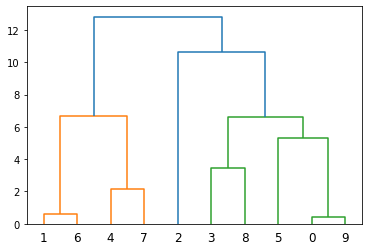

In [66]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(np.array(movies), 'ward')
dn = dendrogram(Z)


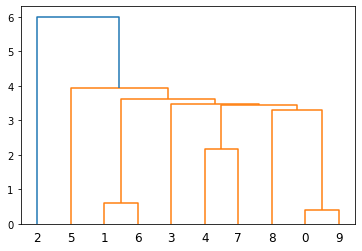

In [67]:
Z = linkage(np.array(movies), 'single')
dn = dendrogram(Z)

### Normalizado

In [68]:
# Con la media

def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

In [69]:
movies_n = mean_norm(movies)

<AxesSubplot:>

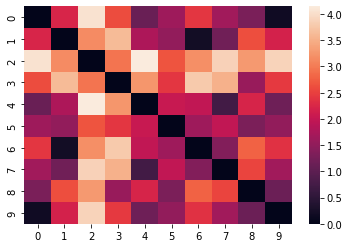

In [71]:
sns.heatmap(matriz_distancias(movies_n, 'euclideana'))

<AxesSubplot:>

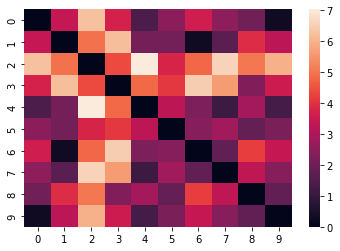

In [72]:
sns.heatmap(matriz_distancias(movies_n, 'manhattan'))

<AxesSubplot:>

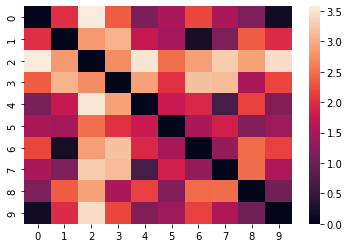

In [73]:
sns.heatmap(matriz_distancias(movies_n, 'minkoski'))

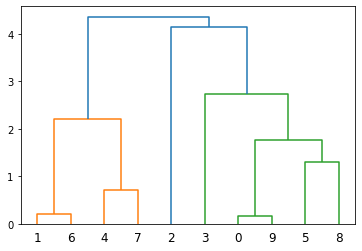

In [74]:
Z = linkage(np.array(movies_n), 'ward')
dn = dendrogram(Z)

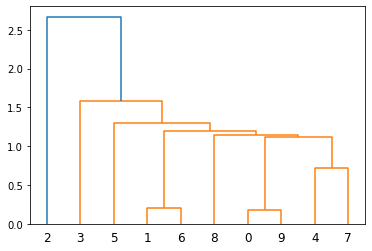

In [75]:
Z = linkage(np.array(movies_n), 'single')
dn = dendrogram(Z)